<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Angewandte Geophysik II: Kap 8: Georadar
# Laufzeitkurven
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

Zunächst generieren wir ein 50m langes Profil,
und setzen die Vakuumwerte für 
- elektrische Permittivität $\epsilon_0$ [As/(Vm)]
- magnetische Permeabilität $\mu_0$ [N(A$^2$]
- Lichtgeschwindigkeit $c=\frac{1}{\sqrt{\epsilon_0 \mu_0}}$ [m/s]

In [2]:
# define profile
xmin  = 0.
xmax  = +50.
xstep = 101
x = np.linspace(xmin,xmax,xstep)

In [3]:
epsilon0 = 8.8541878128e-12 # A s/V/m
mu0      = 4.*np.pi*1e-7    # N/A^2
c0       = 1/np.sqrt(epsilon0*mu0)
print(c0)

299792458.0816064


As materials, we define:

| material         | $\epsilon_r$     |
|:----------------:|:----------------:|
| dry sand         | 4                |
| wet sand         | 30               |
| limestone        | 6                |

In [4]:
er1 = 4  # dry sand
er1 = 30 # wet sand
er2 = 6  # limestone
c1 = c0/np.sqrt(er1)
c2 = c0/np.sqrt(er2)
h1 = 5. # m

Wir visualisieren uns für verschiedene Materialzusammensetzung die Laufzeiten der verschiedenen
Wellentypen:

- **Luftwelle (air wave):**
$t_a=\frac{x}{c_0}$
- **Bodenwelle (ground wave):**
$t_g=\frac{x}{c_1}$
- **Reflektierte Welle (reflected wave):**
$t_r=\frac{1}{c_1} \sqrt{x^2+4h^2}$
- **Lateralwelle:**
$t_l=\frac{x}{c_0} + 2h \sqrt{\frac{1}{c_1^2} - \frac{1}{c_0^2}}$
- **Refraktierte Welle (refracted wave):**
$t_f=\frac{x}{c_2} + 2h \sqrt{\frac{1}{c_1^2} - \frac{1}{c_2^2}}$

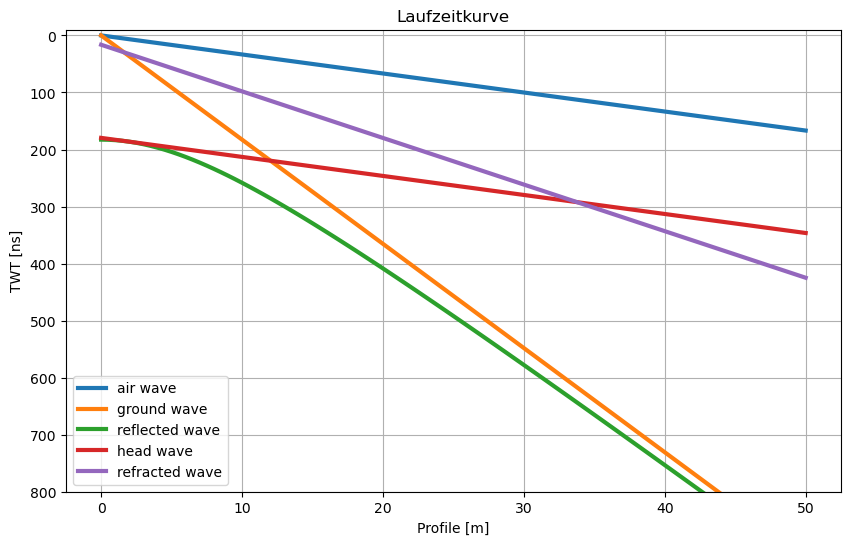

In [25]:
tair = x/c0
tground = x/c1
treflex = 1/c1 * np.sqrt(x**2 + 4*h1**2)
thead   = x/c0 + 2*h1*np.sqrt(1/c1**2 - 1/c0**2)
trefrac = x/c2 + np.sqrt(1/c1**2 - 1/c2**2)

plt.figure(figsize=(10,6))
plt.title('Laufzeitkurve')
plt.xlabel('Profile [m]')
plt.ylabel('TWT [ns]')
plt.ylim([800,-10])
plt.plot(x,tair*1e9,lw=3,label='air wave')
plt.plot(x,tground*1e9,lw=3,label='ground wave')
plt.plot(x,treflex*1e9,lw=3,label='reflected wave')
plt.plot(x,thead*1e9,lw=3,label='head wave')
plt.plot(x,trefrac*1e9,lw=3,label='refracted wave')
plt.grid()
plt.legend()

In [26]:
def traveltime(er1,er2=2,h1=5):
    """
    traveltime curve with wave types for specific material
    """
    er = [4,30,6]
    # define profile
    x = np.linspace(0,50,101)
    # define constants
    epsilon0 = 8.8541878128e-12 # A s/V/m
    mu0      = 4.*np.pi*1e-7    # N/A^2
    c0       = 1/np.sqrt(epsilon0*mu0)
    # layers
    c1 = c0/np.sqrt(er[er1])
    c2 = c0/np.sqrt(er[er2])
    # calculate travel times
    tair = x/c0
    tground = x/c1
    treflex = 1/c1 * np.sqrt(x**2 + 4*h1**2)
    thead   = x/c0 + 2*h1*np.sqrt(1/c1**2 - 1/c0**2)
    trefrac = x/c2 + np.sqrt(1/c1**2 - 1/c2**2)
    # plot
    print(er1,er2)
    plt.figure(figsize=(10,6))
    if (er1==0):
        layer1 = 'dry sand'
    elif (er1==1):
        layer1 = 'wet sand'
    elif (er1==2):
        layer1 = 'limestone'
    if (er2==0):
        layer2 = 'dry sand'
    elif (er2==1):
        layer2 = 'wet sand'
    elif (er2==2):
        layer2 = 'limestone'
    plt.title('Laufzeitkurve '+layer1+'/'+layer2)
    plt.xlabel('Profile [m]')
    plt.ylabel('TWT [ns]')
    plt.ylim([800,-10])
    plt.plot(x,tair*1e9,lw=3,label='air wave')
    plt.plot(x,tground*1e9,lw=3,label='ground wave')
    plt.plot(x,treflex*1e9,lw=3,label='reflected wave')
    plt.plot(x,thead*1e9,lw=3,label='head wave')
    plt.plot(x,trefrac*1e9,lw=3,label='refracted wave')
    plt.grid()
    plt.legend()

1 2


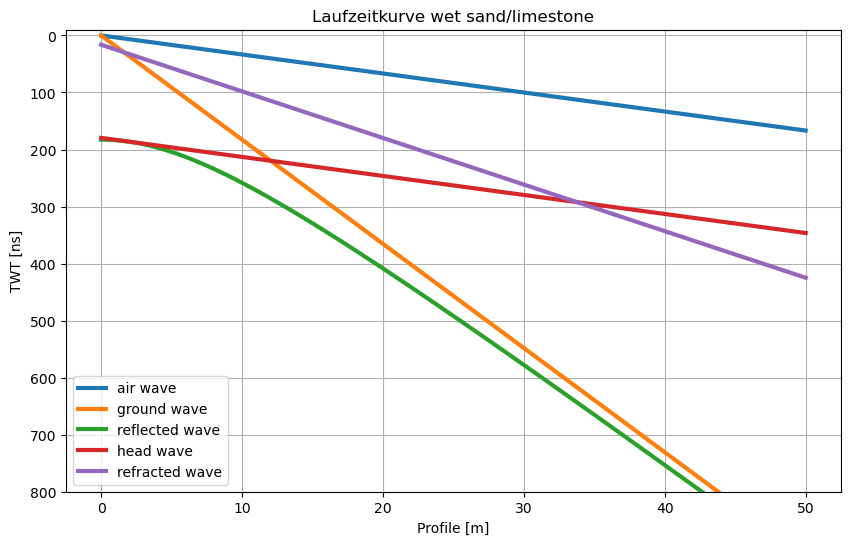

In [27]:
traveltime(er1=1)

In [28]:
# call interactive module
w = dict(
er1 = widgets.Dropdown(options=[('dry sand', 0), 
                                ('wet sand', 1), 
                                ('limestone', 2)],value=1,description='Material1:'),
er2 = widgets.Dropdown(options=[('dry sand', 0), 
                                ('wet sand', 1), 
                                ('limestone', 2)],value=2,description='Material2:')
)
output = widgets.interactive_output(traveltime, w)
box = widgets.VBox([*w.values(), output])
display(box)

... done